# PCA and k-means

## Setting up

In [24]:
"""
Author      : Yi-Chieh Wu, Sriram Sankararaman
"""

# numpy and scipy libraries
import numpy as np
from scipy import stats

# matplotlib libraries
import matplotlib.pyplot as plt
import collections

In [25]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import sys
# Change the path below to the path where your folder locates
# where you have util.py
### ========== TODO : START ========== ###
sys.path.append('/content/drive/MyDrive/m146hw4')
### ========== TODO : START ========== ###


In [28]:
import util
from util import *

## Point, Cluster and Set of Clusters classes

In [29]:
######################################################################
# classes
######################################################################

class Point(object) :
    
    def __init__(self, name, label, attrs) :
        """
        A data point.
        
        Attributes
        --------------------
            name  -- string, name
            label -- string, label
            attrs -- string, features
        """
        
        self.name = name
        self.label = label
        self.attrs = attrs
    
    
    #============================================================
    # utilities
    #============================================================
    
    def distance(self, other) :
        """
        Return Euclidean distance of this point with other point.
        
        Parameters
        --------------------
            other -- Point, point to which we are measuring distance
        
        Returns
        --------------------
            dist  -- float, Euclidean distance
        """
        # Euclidean distance metric
        return np.linalg.norm(self.attrs-other.attrs)
    
    
    def __str__(self) :
        """
        Return string representation.
        """
        return "%s : (%s, %s)" % (self.name, str(self.attrs), self.label)

In [30]:
class Cluster(object) :
    
    def __init__(self, points) :
        """
        A cluster (set of points).
        
        Attributes
        --------------------
            points -- list of Points, cluster elements
        """        
        self.points = points
    
    
    def __str__(self) :
        """
        Return string representation.
        """
        s = ""
        for point in self.points :
            s += str(point)
        return s
        
    #============================================================
    # utilities
    #============================================================
    
    def purity(self) :
        """
        Compute cluster purity.
        
        Returns
        --------------------
            n           -- int, number of points in this cluster
            num_correct -- int, number of points in this cluster
                                with label equal to most common label in cluster
        """        
        labels = []
        for p in self.points :
            labels.append(p.label)
        
        cluster_label, count = stats.mode(labels)
        return len(labels), np.float64(count)
    
    
    def centroid(self) :
        """
        Compute centroid of this cluster.
        
        Returns
        --------------------
            centroid -- Point, centroid of cluster
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        # set the centroid label to any value (e.g. the most common label in this cluster)
        attr = []
        labels = []
        length_pts = 0.0
        #makes a list of attributes and labels for each element
        for ptr in self.points:
          attr.append(ptr.attrs)
          labels.append(ptr.label)
          length_pts = length_pts + 1.0
        cent_attr = np.sum(attr, axis=0)/length_pts
        cent_label = stats.mode(labels)
        centroid = Point('BigBoiCent', cent_label, cent_attr)
        return centroid
        ### ========== TODO : END ========== ###
    
    
    def medoid(self) :
        """
        Compute medoid of this cluster, that is, the point in this cluster
        that is closest to all other points in this cluster.
        
        Returns
        --------------------
            medoid -- Point, medoid of this cluster
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        dist_arr = []
        dist = 0.0
        desired_pt = self.points[0] 
        smallest_dist = -1.0
        for pt in self.points:
          curr_pt = pt
          for check in self.points:
            if check != curr_pt:
              dist_arr.append(curr_pt.distance(check))
          dist = np.sum(dist_arr)
          dist_arr = []
          if smallest_dist < 0.0:
            desired_pt = pt
            smallest_dist = dist    
          elif dist < smallest_dist:
            desired_pt = pt
            smallest_dist = dist
        medoid = desired_pt
        return medoid
        ### ========== TODO : END ========== ###
    
    
    def equivalent(self, other) :
        """
        Determine whether this cluster is equivalent to other cluster.
        Two clusters are equivalent if they contain the same set of points
        (not the same actual Point objects but the same geometric locations).
        
        Parameters
        --------------------
            other -- Cluster, cluster to which we are comparing this cluster
        
        Returns
        --------------------
            flag  -- bool, True if both clusters are equivalent or False otherwise
        """
        
        if len(self.points) != len(other.points) :
            return False
        
        matched = []
        for point1 in self.points :
            for point2 in other.points :
                if point1.distance(point2) == 0 and point2 not in matched :
                    matched.append(point2)
        return len(matched) == len(self.points)

In [31]:
class ClusterSet(object):

    def __init__(self) :
        """
        A cluster set (set of clusters).
        
        Parameters
        --------------------
            members -- list of Clusters, clusters that make up this set
        """
        self.members = []
    
    
    #============================================================
    # utilities
    #============================================================    
    
    def centroids(self) :
        """
        Return centroids of each cluster in this cluster set.
        
        Returns
        --------------------
            centroids -- list of Points, centroids of each cluster in this cluster set
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        centroids = []
        for clust in self.members:
          centroids.append(clust.centroid()) 
        return centroids
        ### ========== TODO : END ========== ###
    
    
    def medoids(self) :
        """
        Return medoids of each cluster in this cluster set.
        
        Returns
        --------------------
            medoids -- list of Points, medoids of each cluster in this cluster set
        """
        
        ### ========== TODO : START ========== ###
        # part 2b: implement
        medoids = []
        for clust in self.members:
          medoids.append(clust.medoid())
        return medoids
        ### ========== TODO : END ========== ###
    
    
    def score(self) :
        """
        Compute average purity across clusters in this cluster set.
        
        Returns
        --------------------
            score -- float, average purity
        """
        
        total_correct = 0
        total = 0
        for c in self.members :
            n, n_correct = c.purity()
            total += n
            total_correct += n_correct
        return total_correct / float(total)
    
    
    def equivalent(self, other) :
        """ 
        Determine whether this cluster set is equivalent to other cluster set.
        Two cluster sets are equivalent if they contain the same set of clusters
        (as computed by Cluster.equivalent(...)).
        
        Parameters
        --------------------
            other -- ClusterSet, cluster set to which we are comparing this cluster set
        
        Returns
        --------------------
            flag  -- bool, True if both cluster sets are equivalent or False otherwise
        """
        
        if len(self.members) != len(other.members):
            return False
        
        matched = []
        for cluster1 in self.members :
            for cluster2 in other.members :
                if cluster1.equivalent(cluster2) and cluster2 not in matched:
                    matched.append(cluster2)
        return len(matched) == len(self.members)
    
    
    #============================================================
    # manipulation
    #============================================================

    def add(self, cluster):
        """
        Add cluster to this cluster set (only if it does not already exist).
        
        If the cluster is already in this cluster set, raise a ValueError.
        
        Parameters
        --------------------
            cluster -- Cluster, cluster to add
        """
        
        if cluster in self.members :
            raise ValueError
        
        self.members.append(cluster)

## k-means and k-medoids algorithms

In [32]:
######################################################################
# k-means and k-medoids
######################################################################

def random_init(points, k) :
    """
    Randomly select k unique elements from points to be initial cluster centers.
    
    Parameters
    --------------------
        points         -- list of Points, dataset
        k              -- int, number of clusters
    
    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    ### ========== TODO : START ========== ###
    # part 2c: implement (hint: use np.random.choice)
    initial_points = np.random.choice(points, size=k, replace=False)
    return initial_points
    ### ========== TODO : END ========== ###


def cheat_init(points) :
    """
    Initialize clusters by cheating!
    
    Details
    - Let k be number of unique labels in dataset.
    - Group points into k clusters based on label (i.e. class) information.
    - Return medoid of each cluster as initial centers.
    
    Parameters
    --------------------
        points         -- list of Points, dataset
    
    Returns
    --------------------
        initial_points -- list of k Points, initial cluster centers
    """
    ### ========== TODO : START ========== ###
    # part 2f: implement
    label = []
    for pt in points:
        if pt.label not in label:
          label.append(pt.label)
    k = len(label)

    cluster_holder = []
    for lbl in label:
      temp = []
      for pt in points:
        if pt.label == lbl:
          temp.append(pt)
      cluster_holder.append(temp)
    initial_points = []
    for clust_points in cluster_holder:
      cluster = Cluster(clust_points)
      initial_points.append(cluster.medoid())
    return initial_points
    ### ========== TODO : END ========== ###


def kMeans(points, k, init='random', plot=False) :
    """
    Cluster points into k clusters using variations of k-means algorithm.
    
    Parameters
    --------------------
        points  -- list of Points, dataset
        k       -- int, number of clusters
        average -- method of ClusterSet
                   determines how to calculate average of points in cluster
                   allowable: ClusterSet.centroids, ClusterSet.medoids
        init    -- string, method of initialization
                   allowable: 
                       'cheat'  -- use cheat_init to initialize clusters
                       'random' -- use random_init to initialize clusters
        plot    -- bool, True to plot clusters with corresponding averages
                         for each iteration of algorithm
    
    Returns
    --------------------
        k_clusters -- ClusterSet, k clusters
    """
    
    ### ========== TODO : START ========== ###
    # part 2c: implement
    # Hints:
    #   (1) On each iteration, keep track of the new cluster assignments
    #       in a separate data structure. Then use these assignments to create
    #       a new ClusterSet object and update the centroids.
    #   (2) Repeat until the clustering no longer changes.
    #   (3) To plot, use plot_clusters(...).
    centers = []
    if init == 'random':
      centers = random_init(points, k)
    elif init == 'cheat':
      centers = cheat_init(points)
    #for every point
    #check each point against every center to see which it is closest to
    #after checking, assign the corresponding point to that cluster
    
    
    k_clusters = ClusterSet()
    #https://wiki.python.org/moin/ForLoop
    #we want the loop to essentially run forever so we can run the alg until
    #convergence
    while True:
      k_clusters_new = ClusterSet()
      cluster_asmt = []
      for pt in points:
        mindist = -1.0
        tracker = None
        for center in centers:
          dist = pt.distance(center)
          if mindist == -1.0:
            tracker = center
            mindist = dist
          elif dist < mindist:
            tracker = center
            mindist = dist
        cluster_asmt.append(tracker)   
    
      cluster_holder = []
      for center in centers:
        counter = 0
        temp_holder = []
        while(counter < len(points)):  
          if cluster_asmt[counter] == center:
            temp_holder.append(points[counter])
          counter = counter + 1
        #makes sure that there is a k_clusters set to compare the new k_clusters
        #with
        cluster_holder.append(temp_holder)
      #cluster_holder is a list of lists as it is a list which has an index
      #that carries a list of points assigned to a cluster
      #we need to iterate and add 1 list at a time to a cluster
      for c in cluster_holder:
        k_clusters_new.add(Cluster(c))
      if plot:
        plot_clusters(k_clusters_new, 'current clusters', ClusterSet.centroids)
      if k_clusters_new.equivalent(k_clusters):
        return k_clusters_new
      #new centers if the algorithm has not terminated
      k_clusters = k_clusters_new
      centers = k_clusters_new.centroids()
    return k_clusters
    ### ========== TODO : END ========== ###


def kMedoids(points, k, init='random', plot=False) :
    """
    Cluster points in k clusters using k-medoids clustering.
    See kMeans(...).
    """
    ### ========== TODO : START ========== ###
    # part 2e: implement
    
    k_clusters = kAverages(points, k, average='medoids', init=init, plot=plot)
    return k_clusters
    ### ========== TODO : END ========== ###

def kAverages(points, k, average, init='random', plot=False) :
    centers = []
    if init == 'random':
      centers = random_init(points, k)
    elif init == 'cheat':
      centers = cheat_init(points)
    #for every point
    #check each point against every center to see which it is closest to
    #after checking, assign the corresponding point to that cluster
    
    
    k_clusters = ClusterSet()
    #https://wiki.python.org/moin/ForLoop
    #we want the loop to essentially run forever so we can run the alg until
    #convergence
    while True:
      k_clusters_new = ClusterSet()
      cluster_asmt = []
      for pt in points:
        mindist = -1.0
        tracker = None
        for center in centers:
          dist = pt.distance(center)
          if mindist == -1.0:
            tracker = center
            mindist = dist
          elif dist < mindist:
            tracker = center
            mindist = dist
        cluster_asmt.append(tracker)   
    
      cluster_holder = []
      for center in centers:
        counter = 0
        temp_holder = []
        while(counter < len(points)):  
          if cluster_asmt[counter] == center:
            temp_holder.append(points[counter])
          counter = counter + 1
        #makes sure that there is a k_clusters set to compare the new k_clusters
        #with
        cluster_holder.append(temp_holder)
      #cluster_holder is a list of lists as it is a list which has an index
      #that carries a list of points assigned to a cluster
      #we need to iterate and add 1 list at a time to a cluster
      for c in cluster_holder:
        k_clusters_new.add(Cluster(c))
      if plot:
        if average == 'centroids':
          plot_clusters(k_clusters_new, 'current clusters', ClusterSet.centroids)
        elif average == 'medoids':
          plot_clusters(k_clusters_new, 'current clusters', ClusterSet.medoids)
      if k_clusters_new.equivalent(k_clusters):
        return k_clusters_new
      #new centers if the algorithm has not terminated
      k_clusters = k_clusters_new
      if average == 'centroids':
        centers = k_clusters_new.centroids()
      elif average == 'medoids':
        centers = k_clusters_new.medoids()
    return k_clusters


## Utilities

In [33]:
######################################################################
# helper functions
######################################################################

def build_face_image_points(X, y) :
    """
    Translate images to (labeled) points.
    
    Parameters
    --------------------
        X     -- numpy array of shape (n,d), features (each row is one image)
        y     -- numpy array of shape (n,), targets
    
    Returns
    --------------------
        point -- list of Points, dataset (one point for each image)
    """
    
    n,d = X.shape
    
    images = collections.defaultdict(list) # key = class, val = list of images with this class
    for i in range(n) :
        images[y[i]].append(X[i,:])
    
    points = []
    for face in images :
        count = 0
        for im in images[face] :
            points.append(Point(str(face) + '_' + str(count), face, im))
            count += 1

    return points


def plot_clusters(clusters, title, average) :
    """
    Plot clusters along with average points of each cluster.

    Parameters
    --------------------
        clusters -- ClusterSet, clusters to plot
        title    -- string, plot title
        average  -- method of ClusterSet
                    determines how to calculate average of points in cluster
                    allowable: ClusterSet.centroids, ClusterSet.medoids
    """
    
    plt.figure()
    np.random.seed(20)
    label = 0
    colors = {}
    centroids = average(clusters)
    for c in centroids :
        coord = c.attrs
        plt.plot(coord[0],coord[1], 'ok', markersize=12)
    for cluster in clusters.members :
        label += 1
        colors[label] = np.random.rand(3,)
        for point in cluster.points :
            coord = point.attrs
            plt.plot(coord[0], coord[1], 'o', color=colors[label])
    plt.title(title)
    plt.show()


def generate_points_2d(N, seed=1234) :
    """
    Generate toy dataset of 3 clusters each with N points.
    
    Parameters
    --------------------
        N      -- int, number of points to generate per cluster
        seed   -- random seed
    
    Returns
    --------------------
        points -- list of Points, dataset
    """
    np.random.seed(seed)
    
    mu = [[0,0.5], [1,1], [2,0.5]]
    sigma = [[0.1,0.1], [0.25,0.25], [0.15,0.15]]
    
    label = 0
    points = []
    for m,s in zip(mu, sigma) :
        label += 1
        for i in range(N) :
            x = random_sample_2d(m, s)
            points.append(Point(str(label)+'_'+str(i), label, x))
    
    return points

## Main function

Total dataset size:
	num_samples: 1867
	num_features: 1850
	num_classes: 19
Beginning question 1 part a
Printing couple of faces


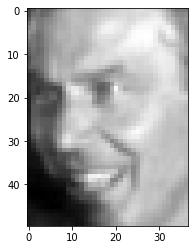

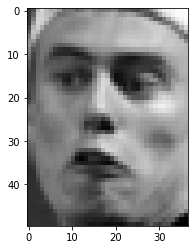

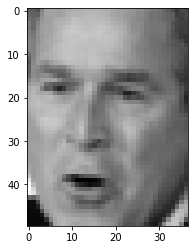

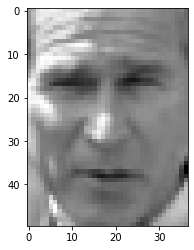

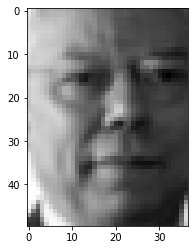

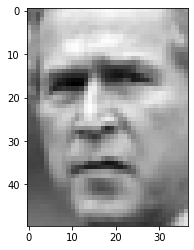

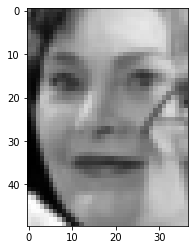

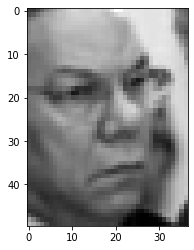

Printing mean face


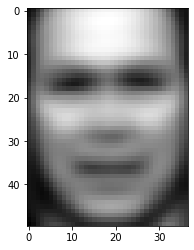


Beginning question 1 part b
Getting values for U and mu
Plotting top 12 eigenfaces


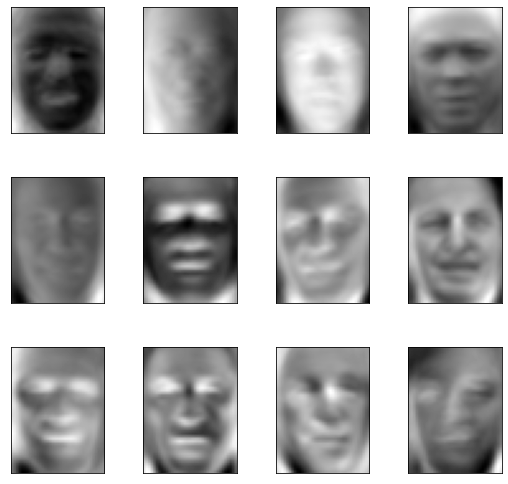


Beginning question 1 part c
Printing using l = 1


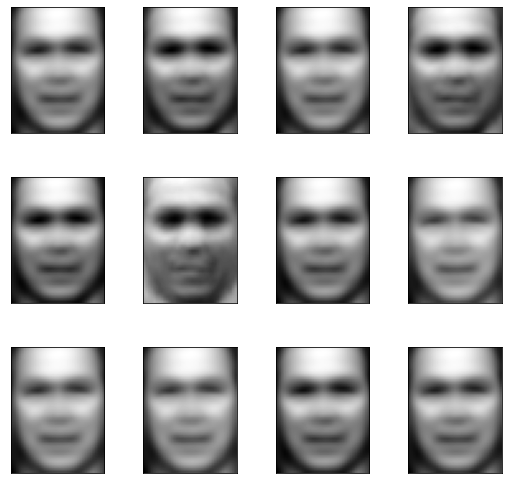

Printing using l = 10


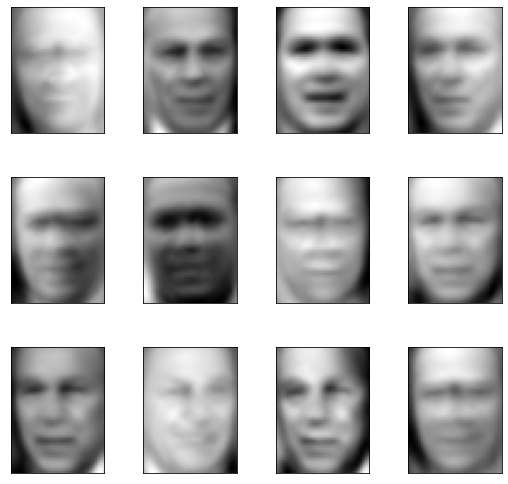

Printing using l = 50


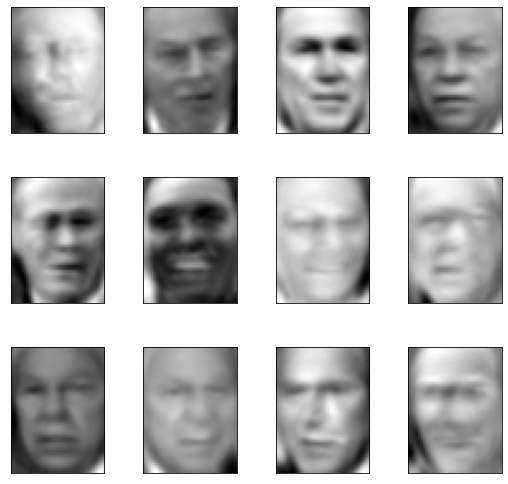

Printing using l = 100


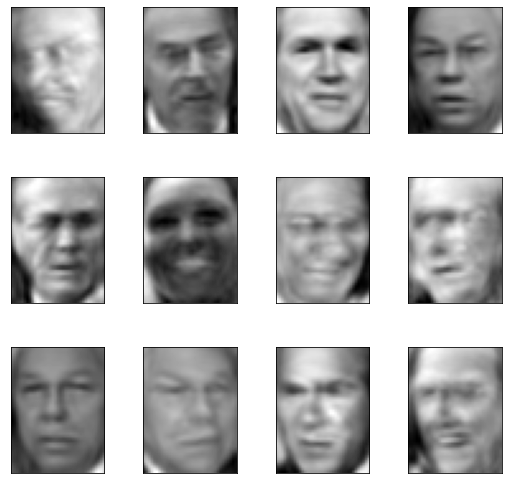

Printing using l = 500


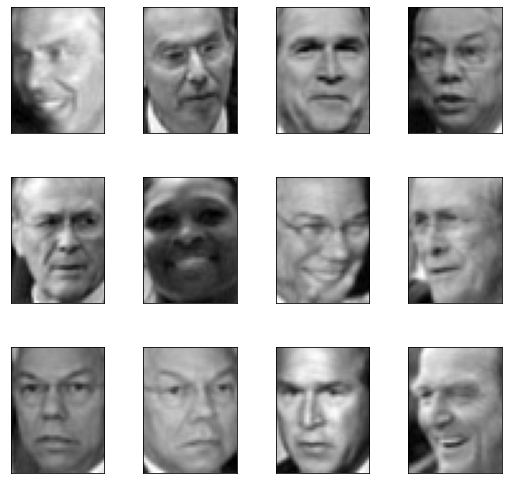

Printing using l = 1288


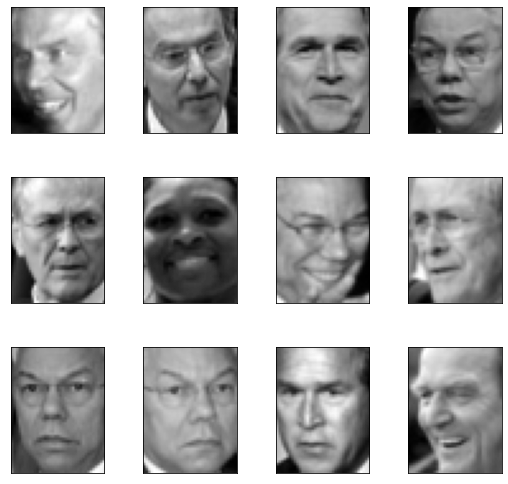


Beginning question 2 part d


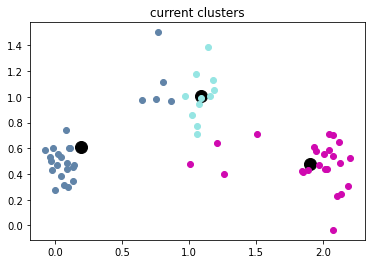

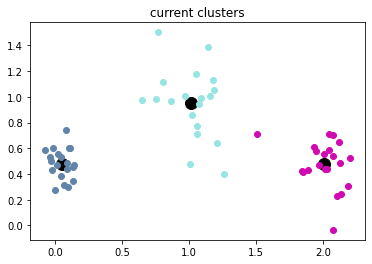

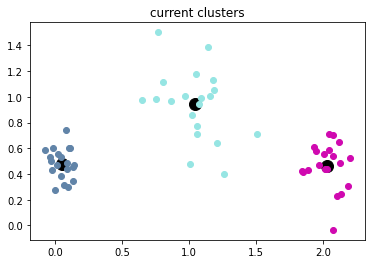

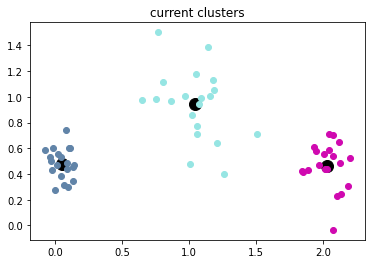


Beginning question 2 part e


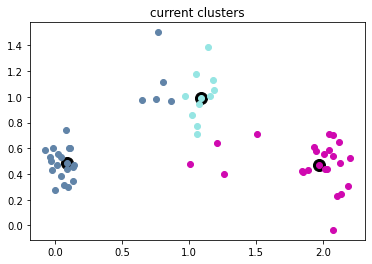

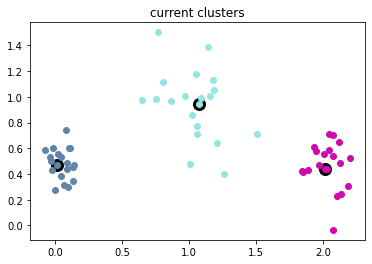

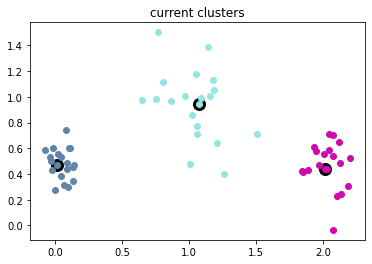


Beginning question 2 part f


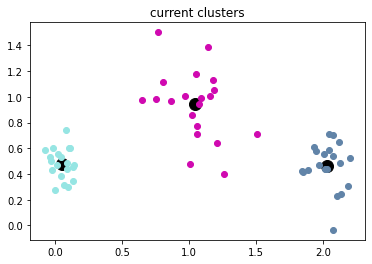

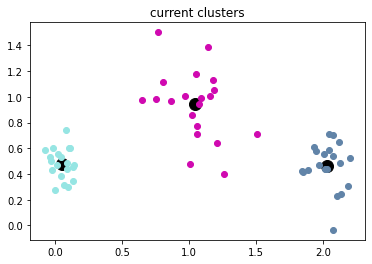

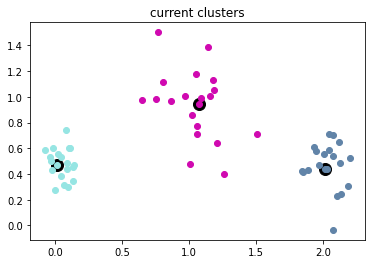

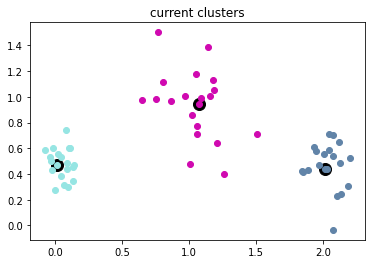


Beginning question 3 part a
The kmeans_score average is  0.6174999999999999
The kmeans_score min is  0.55
The kmeans_score max is  0.775 

The kmedoid_score average is  0.6325
The kmedoid_score min is  0.575
The kmedoid_score max is  0.725 


Beginning question 3 part b
The kmeans_score average is  0.7041666666666668
The kmeans_score min is  0.5125
The kmeans_score max is  0.8375 

The kmedoid_score average is  0.8255952380952378
The kmedoid_score min is  0.5
The kmedoid_score max is  0.9 



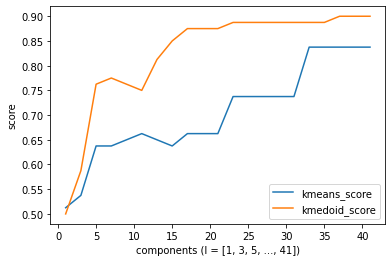

Beginning of question 3 part c
Least Discriminative


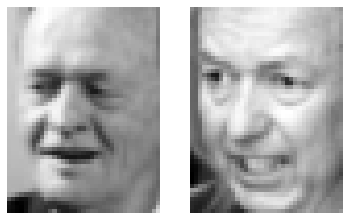

Most Discriminative


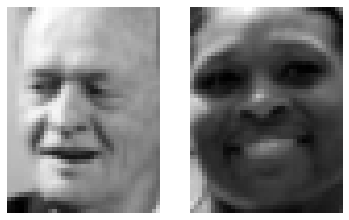

In [34]:
######################################################################
# main
######################################################################

def main() :
    ### ========== TODO : START ========== ###
    # part 1: explore LFW data set
    X, y = get_lfw_data()
    n, d = X.shape
    count = 0
    print('Beginning question 1 part a')
    print('Printing couple of faces')
    while(count < 1867):
        show_image(im = X[count])
        count = count + 250
    num = np.sum(X, axis=0)
    avg = num/1867
    print('Printing mean face')
    show_image(avg)
    print('\nBeginning question 1 part b')
    print('Getting values for U and mu')
    U, mu = util.PCA(X)
    print('Plotting top 12 eigenfaces')
    plot_gallery([vec_to_image(U[:,i]) for i in range(12)])
    print('\nBeginning question 1 part c')
    arr = [1, 10, 50, 100, 500, 1288]
    for num in arr:
      print('Printing using l =',num)
      Z, Ul = apply_PCA_from_Eig(X, U, num, mu)
      X_rec = reconstruct_from_PCA(Z, Ul, mu)
      plot_gallery(X_rec)
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # part 2d-2f: cluster toy dataset
    print('\nBeginning question 2 part d')
    np.random.seed(1234)
    pts = generate_points_2d(N=20)
    kMeans(points=pts, k=3, plot=True)

    print('\nBeginning question 2 part e')
    np.random.seed(1234)
    pts = generate_points_2d(N=20)
    kMedoids(points=pts, k=3, plot=True)

    print('\nBeginning question 2 part f')
    np.random.seed(1234)
    pts = generate_points_2d(N=20)
    kMeans(points=pts, k=3, init='cheat',plot=True)

    np.random.seed(1234)
    pts = generate_points_2d(N=20)
    kMedoids(points=pts, k=3, init='cheat', plot=True)

    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###    
    # part 3a: cluster faces
    print('\nBeginning question 3 part a')
    np.random.seed(1234)
    X1, y1 = util.limit_pics(X, y, [4, 6, 13, 16], 40)
    points = build_face_image_points(X1, y1)
    i = 0
    kmeans_score = []
    kmedoid_score = []
    while i < 10:
      kmeans_score.append(kMeans(points=points, k=4).score())
      kmedoid_score.append(kMedoids(points=points, k=4).score())
      i = i + 1
    print('The kmeans_score average is ', np.sum(kmeans_score)/len(kmeans_score))
    print('The kmeans_score min is ', min(kmeans_score))
    print('The kmeans_score max is ', max(kmeans_score), '\n')
    print('The kmedoid_score average is ', np.sum(kmedoid_score)/len(kmedoid_score))
    print('The kmedoid_score min is ', min(kmedoid_score))
    print('The kmedoid_score max is ', max(kmedoid_score), '\n')
    
    # part 3b: explore effect of lower-dimensional representations on clustering performance
    print('\nBeginning question 3 part b')
    np.random.seed(1234)
    X1, y1 = util.limit_pics(X, y, [4, 13], 40)
    U, mu = util.PCA(X)
    i = 1
    arr = []
    kmeans_score = []
    kmedoid_score = []
    while i < 42:
      arr.append(i)
      i = i + 2
    for num in arr:
      Z, Ul = apply_PCA_from_Eig(X1, U, num, mu)
      points = build_face_image_points(Z, y1)
      kmeans_score.append(kMeans(points=points, k=2, init='cheat').score())
      kmedoid_score.append(kMedoids(points=points, k=2, init='cheat').score())
    print('The kmeans_score average is ', np.sum(kmeans_score)/len(kmeans_score))
    print('The kmeans_score min is ', min(kmeans_score))
    print('The kmeans_score max is ', max(kmeans_score), '\n')
    print('The kmedoid_score average is ', np.sum(kmedoid_score)/len(kmedoid_score))
    print('The kmedoid_score min is ', min(kmedoid_score))
    print('The kmedoid_score max is ', max(kmedoid_score), '\n')
    
    plt.show()
    plt.plot(arr, kmeans_score)
    plt.plot(arr, kmedoid_score)
    plt.ylabel('score')
    plt.xlabel('components (l = [1, 3, 5, ..., 41])')
    plt.legend(['kmeans_score', 'kmedoid_score'], loc ='lower right')
    plt.show()
    # part 3c: determine ``most discriminative'' and ``least discriminative'' pairs of images
    print('Beginning of question 3 part c')
    np.random.seed(1234)

    pair = []
    val = []
    min_class = None
    max_class = None
    for a in range(0, 19):
      for b in range(a+1, 19):
        X1, y1 = util.limit_pics(X, y, [a, b], 40)
        points = build_face_image_points(X1, y1)
        pair.append([a,b])
        val.append(kMedoids(points=points, k=2, init='cheat').score())
    min_val = min(val) 
    max_val = max(val)

    min_max_found = False
    min_index = None
    max_index = None
    index = 0
    while index < len(val) and min_max_found == False:
      if val[index] == min_val or val[index] == max_val:
        if val[index] == min_val:
          min_index = index
          if max_index is not None:
            min_max_found = True

        if val[index] == max_val:
          max_index = index
          if min_index is not None:
            min_max_found = True
      index = index + 1
    
    min_class = pair[min_index]
    max_class = pair[max_index]

    #for min
    class1 = None
    class2 = None
    for a in min_class:
      if class1 is None:
        class1 = a
      else:
        class2 = a
    X1, y1 = util.limit_pics(X, y, [class1, class2], 40)
    points = build_face_image_points(X1, y1)
    labels = []
    for pt in points:
      labels.append(pt.label)
    labels = np.unique(labels)
    print('Least Discriminative')
    plot_representative_images(X1, y1, labels)

    #for max
    class1 = None
    class2 = None
    for a in max_class:
      if class1 is None:
        class1 = a
      else:
        class2 = a
    X1, y1 = util.limit_pics(X, y, [class1, class2], 40)
    points = build_face_image_points(X1, y1)
    labels = []
    for pt in points:
      labels.append(pt.label)
    labels = np.unique(labels)

    print('Most Discriminative')
    plot_representative_images(X1, y1, labels)
    ### ========== TODO : END ========== ###


if __name__ == "__main__" :
    main()